## Imports

In [1]:
from helpers import *

# Models
from sklearn.svm import SVC, LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import VotingClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split

# Scalers
from sklearn.preprocessing import MinMaxScaler

In [2]:
# feature extraction parameters
opt = {
        'sharpness_factor': 10,
        'bordersize': 3,
        'show_images': False,
        'is_binary': False,
        'LBP_numPoints': 8,
        'LBP_radius':1,
        'LBP_method': 'uniform',
        'HOG_width': 64,
        'HOG_height': 128,
    }

In [3]:
X, Y = read_data("data_set", windows=False)


0start ..
1start ..


In [4]:
data_train, data_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [6]:
HOG_feature_training, HINGE_feature_training, COLD_feature_training = extract_features(imgs=data_train, options=opt)

  0%|                                                                                          | 0/290 [00:00<?, ?it/s]C:\Users\Yousif-Ahmed\anaconda3\lib\site-packages\skimage\_shared\utils.py:338: FutureWarning: `multichannel` is a deprecated argument name for `hog`. It will be removed in version 1.0.Please use `channel_axis` instead.
  return func(*args, **kwargs)
C:\Users\Yousif-Ahmed\gender-classification\cold_feature_extraction.py:127: RuntimeWarning: divide by zero encountered in log10
  rhos_log_space = np.log10(rhos)
100%|████████████████████████████████████████████████████████████████████████████████| 290/290 [11:58<00:00,  2.48s/it]


In [7]:
HOG_feature_testing, HINGE_feature_testing, COLD_feature_testing = extract_features(imgs=data_test, options=opt)

100%|██████████████████████████████████████████████████████████████████████████████████| 73/73 [02:25<00:00,  2.00s/it]


## Scaling Features

In [10]:
# scaler = MinMaxScaler()
# training_features = scaler.fit_transform(training_HOG)
# testing_features = scaler.transform(testing_HOG)

In [ ]:
scaler = MinMaxScaler()
HOG_feature_training_scaled  = scaler.fit_transform(HOG_feature_training)
HOG_feature_testing_sclaed = scaler.transform(HOG_feature_testing)

HINGE_feature_training_scaled = scaler.fit_transform(HINGE_feature_training)
HINGE_feature_testing_scaled = scaler.transform(HINGE_feature_testing)

COLD_feature_training_scaled = scaler.fit_transform(COLD_feature_training)
COLD_feature_testing_scaled = scaler.transform(COLD_feature_testing)

## SVM

### HOG

In [12]:
svm_hog = LinearSVC(C=100, random_state=42, max_iter=2000)
svm_hog = svm_hog.fit(HOG_feature_training, y_train)
test_pred_hog_svm = svm_hog.predict(HOG_feature_testing)
print(f"Testing accuracy is %0.2f"%(np.sum(test_pred_hog_svm == y_test)/len(y_test) * 100))

Testing accuracy is 73.97


C:\Users\Yousif-Ahmed\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


In [13]:
svm_hog = LinearSVC(C=100, random_state=42, max_iter=2000)
svm_hog = svm_hog.fit(HOG_feature_training_scaled, y_train)
test_pred_hog_svm = svm_hog.predict(HOG_feature_testing_sclaed)
print(f"Testing accuracy is %0.2f"%(np.sum(test_pred_hog_svm == y_test)/len(y_test) * 100))

Testing accuracy is 75.34


### HINGE

In [14]:
svm_hinge = LinearSVC(C=100, random_state=42, max_iter=5000)
svm_hinge = svm_hinge.fit(HINGE_feature_training, y_train)
test_pred_hinge_svm = svm_hinge.predict(HINGE_feature_testing)
print(f"Testing accuracy is %0.2f"%(np.sum(test_pred_hinge_svm == y_test)/len(y_test) * 100))

Testing accuracy is 69.86


In [15]:
svm_hinge = LinearSVC(C=100, random_state=42, max_iter=5000)
svm_hinge = svm_hinge.fit(HINGE_feature_training_scaled, y_train)
test_pred_hinge_svm = svm_hinge.predict(HINGE_feature_testing_scaled)
print(f"Testing accuracy is %0.2f"%(np.sum(test_pred_hinge_svm == y_test)/len(y_test) * 100))

Testing accuracy is 78.08


### COLD

In [16]:
svm_cold = LinearSVC(C=80, random_state=42, max_iter=5000)
svm_cold = svm_cold.fit(COLD_feature_training_scaled, y_train)
test_pred_cold_svm = svm_cold.predict(COLD_feature_testing_scaled)
print(f"Testing accuracy is %0.2f"%(np.sum(test_pred_cold_svm == y_test)/len(y_test) * 100))

Testing accuracy is 65.75


C:\Users\Yousif-Ahmed\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


## Gradient Boosting Classifier

### HOG

In [17]:
gradient_booster_hog = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,max_depth=1, random_state=0)
gradient_booster_hog = gradient_booster_hog.fit(HOG_feature_training, y_train)
test_pred_hog_gradient = gradient_booster_hog.predict(HOG_feature_testing)
print(f"Testing accuracy is %0.2f"%(np.sum(test_pred_hog_gradient == y_test)/len(y_test) * 100))

Testing accuracy is 72.60


In [18]:
gradient_booster_hog = GradientBoostingClassifier(n_estimators=100,loss='exponential', learning_rate=1.0,max_depth=1, random_state=0)
gradient_booster_hog = gradient_booster_hog.fit(HOG_feature_training_scaled, y_train)
test_pred_hog_gradient = gradient_booster_hog.predict(HOG_feature_testing_sclaed)
print(f"Testing accuracy is %0.2f"%(np.sum(test_pred_hog_gradient == y_test)/len(y_test) * 100))

Testing accuracy is 75.34


### HINGE

In [19]:
gradient_booster_hinge = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,max_depth=1, random_state=0)
gradient_booster_hinge = gradient_booster_hinge.fit(HINGE_feature_training, y_train)
test_pred_hinge_gradient = gradient_booster_hinge.predict(HINGE_feature_testing)
print(f"Testing accuracy is %0.2f"%(np.sum(test_pred_hinge_gradient == y_test)/len(y_test) * 100))

Testing accuracy is 73.97


In [20]:
gradient_booster_hinge = GradientBoostingClassifier(n_estimators=100,learning_rate=1.0,max_depth=1, random_state=0)
gradient_booster_hinge = gradient_booster_hinge.fit(HINGE_feature_training_scaled, y_train)
test_pred_hinge_gradient = gradient_booster_hinge.predict(HINGE_feature_testing_scaled)
print(f"Testing accuracy is %0.2f"%(np.sum(test_pred_hinge_gradient == y_test)/len(y_test) * 100))

Testing accuracy is 73.97


### COLD

In [21]:
gradient_booster_cold = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,max_depth=1, random_state=0)
gradient_booster_cold = gradient_booster_cold.fit(COLD_feature_training, y_train)
test_pred_cold_gradient = gradient_booster_cold.predict(COLD_feature_testing)
print(f"Testing accuracy is %0.2f"%(np.sum(test_pred_cold_gradient == y_test)/len(y_test) * 100))

Testing accuracy is 57.53


In [22]:
gradient_booster_cold = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,max_depth=1, random_state=0)
gradient_booster_cold = gradient_booster_cold.fit(COLD_feature_training_scaled, y_train)
test_pred_cold_gradient = gradient_booster_cold.predict(COLD_feature_testing_scaled)
print(f"Testing accuracy is %0.2f"%(np.sum(test_pred_cold_gradient == y_test)/len(y_test) * 100))

Testing accuracy is 57.53


## LogisticRegression

### HOG

In [23]:
lg_hog = LogisticRegression(random_state=42, max_iter=1000, C=10)
lg_hog = lg_hog.fit(HOG_feature_training, y_train)
test_pred_hog_lg = lg_hog.predict(HOG_feature_testing)
print(f"Testing accuracy is %0.2f"%(np.sum(test_pred_hog_lg == y_test)/len(y_test) * 100))

Testing accuracy is 75.34


In [24]:
lg_hog = LogisticRegression(random_state=42, max_iter=1000, C=10)
lg_hog = lg_hog.fit(HOG_feature_training_scaled, y_train)
test_pred_hog_lg = lg_hog.predict(HOG_feature_testing_sclaed)
print(f"Testing accuracy is %0.2f"%(np.sum(test_pred_hog_lg == y_test)/len(y_test) * 100))

Testing accuracy is 71.23


### HINGE

In [25]:
lg_hinge = LogisticRegression(random_state=42, max_iter=1000, C=10)
lg_hinge = lg_hinge.fit(HINGE_feature_training, y_train)
test_pred_hinge_lg = lg_hinge.predict(HINGE_feature_testing)
print(f"Testing accuracy is %0.2f"%(np.sum(test_pred_hinge_lg == y_test)/len(y_test) * 100))

Testing accuracy is 65.75


In [26]:
lg_hinge = LogisticRegression(random_state=42, max_iter=1000, C=10, class_weight="balanced")
lg_hinge = lg_hinge.fit(HINGE_feature_training_scaled, y_train)
test_pred_hinge_lg = lg_hinge.predict(HINGE_feature_testing_scaled)
print(f"Testing accuracy is %0.2f"%(np.sum(test_pred_hinge_lg == y_test)/len(y_test) * 100))

Testing accuracy is 76.71


### COLD

In [29]:
lg_cold = LogisticRegression(random_state=42, max_iter=1000, C=10)
lg_cold = lg_cold.fit(COLD_feature_training, y_train)
test_pred_cold_lg = lg_cold.predict(COLD_feature_testing)
print(f"Testing accuracy is %0.2f"%(np.sum(test_pred_cold_lg == y_test)/len(y_test) * 100))

Testing accuracy is 65.75


In [30]:
lg_cold = LogisticRegression(random_state=42, max_iter=1000, C=10, class_weight="balanced")
lg_cold = lg_cold.fit(COLD_feature_training_scaled, y_train)
test_pred_cold_lg = lg_cold.predict(COLD_feature_testing_scaled)
print(f"Testing accuracy is %0.2f"%(np.sum(test_pred_cold_lg == y_test)/len(y_test) * 100))

Testing accuracy is 80.82


# Voting Classifier

- Logistic Regressor => HOG
- Gradient Boosting Classifier => HINGE
- SVM => COLD

In [31]:
final_train= np.concatenate((svm_cold.predict(COLD_feature_training_scaled).reshape(-1, 1), gradient_booster_hinge.predict(HINGE_feature_training_scaled).reshape(-1, 1)), axis=1)
final_train = np.concatenate((final_train, lg_hog.predict(HOG_feature_training_scaled).reshape(-1, 1)), axis=1)

final_test = np.concatenate((svm_cold.predict(COLD_feature_testing_scaled).reshape(-1, 1), gradient_booster_hinge.predict(HINGE_feature_testing_scaled).reshape(-1, 1)), axis=1)
final_test = np.concatenate((final_test, lg_hog.predict(HOG_feature_testing_sclaed).reshape(-1, 1)), axis=1)

In [32]:
final_y = y_train
clf = LogisticRegression(random_state=42, max_iter=1000, C=10, class_weight="balanced")
clf = clf.fit(final_train, final_y)
test_predicted = clf.predict(final_test)
print(f"Testing accuracy is %0.2f"%(np.sum(test_predicted == y_test)/len(y_test) * 100))

Testing accuracy is 72.60


## GridSearchCV

In [33]:
all_train_features = np.concatenate((HOG_feature_training_scaled, HINGE_feature_training_scaled), axis=1)
all_train_features = np.concatenate((all_train_features, COLD_feature_training_scaled), axis=1)

all_test_features = np.concatenate((HOG_feature_testing_sclaed, HINGE_feature_testing_scaled), axis=1)
all_test_features = np.concatenate((all_test_features, COLD_feature_testing_scaled), axis=1)

In [ ]:
from sklearn.model_selection import GridSearchCV

clf = GradientBoostingClassifier()
parameters = {
    'loss': ('log_loss', 'exponential'), 
    'learning_rate': [1,1.2,1.5], 
    'max_depth': [3,5,8]
}
grid_clf = GridSearchCV(clf, parameters, scoring='f1')
grid_clf.fit(all_train_features, y_train)

In [ ]:
print(f"Training score is %0.2f"%(grid_clf.score(all_train_features, y_train) * 100))
test_pred = grid_clf.predict(all_test_features)
print(f"Testing accuracy is %0.2f"%(np.sum(test_pred == y_test)/len(y_test) * 100))

In [36]:
clf2 = LinearSVC(max_iter=5000, random_state=42)

parameters2 = {
    'C': [1,10,100]
}

grid_clf2 = GridSearchCV(clf2, parameters2, scoring='f1')
grid_clf2.fit(all_train_features, y_train)

GridSearchCV(estimator=LinearSVC(max_iter=5000, random_state=42),
             param_grid={'C': [1, 10, 100]}, scoring='f1')

In [37]:
print(f"Training score is %0.2f"%(grid_clf2.score(all_train_features, y_train) * 100))


test_pred = grid_clf2.predict(all_test_features)
print(f"Testing accuracy is %0.2f"%(np.sum(test_pred == y_test)/len(y_test) * 100))

Training score is 100.00
Testing accuracy is 83.56


In [80]:
all_train_features.shape

(290, 2172)

In [81]:
HOG_feature_training_scaled.shape

(290, 972)

In [82]:
HINGE_feature_training_scaled.shape

(290, 780)

In [83]:
COLD_feature_training_scaled.shape

(290, 420)

# Feature Selection

In [66]:
from sklearn.feature_selection import RFECV

In [ ]:
rfecv = RFECV(
    estimator=GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,max_depth=1, random_state=0),
    cv=3,
    scoring="r2",
    n_jobs=-1,
    min_features_to_select=2,
)
rfecv.fit(all_train_features, y_train)

rfecv.support_

## Testing our best pre-trained model

c:\Users\Donia\anaconda3\lib\site-packages\sklearn\base.py:329: UserWarning: Trying to unpickle estimator LinearSVC from version 1.0.2 when using version 0.23.2. This might lead to breaking code or invalid results. Use at your own risk.
  warnings.warn(


Testing accuracy is 86.30
classification rate Testing Accuracy = 85.75
              precision    recall  f1-score   support

           0       0.91      0.88      0.89        48
           1       0.78      0.84      0.81        25

    accuracy                           0.86        73
   macro avg       0.85      0.86      0.85        73
weighted avg       0.87      0.86      0.86        73

Confusion Matrix Testing Accuracy Data
array([[87.50, 12.50],
       [16.00, 84.00]])


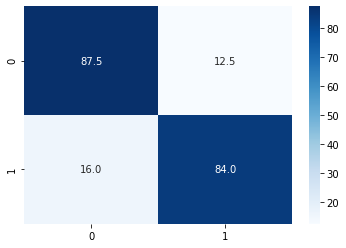

In [2]:
y_test, test_pred = loadModelAndGetAccuraccyLocalTesting("test.csv","test_classes.csv","best_model_ever.sav")
model_evaluation(y_test , test_pred , "Testing Accuracy")